# Autoencoder

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
from keras.layers import Dense, Input, merge
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [0]:
# Model API

In [0]:
# input
i = Input(shape=(784,))

# encoder part(downsampling)
e1 = Dense(256, activation='relu')(i)
e2 = Dense(32, activation='relu')(e1)

# bottle neck (Z Space, Low level representation)
b = Dense(16, activation='relu')(e2)

# decoder part(upsampling)
d1 = Dense(64, activation='relu')(b)
d2 = Dense(512, activation='relu')(d1)

# output
o = Dense(784, activation='sigmoid')(d2)

autoencoder = Model(i, o)

In [19]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_20 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_23 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_24 (Dense)             (None, 784)               4021

In [0]:
# autoencoder.layers[0].name = 'Input layer'
# autoencoder.layers[-1].name = 'Output layer'
# autoencoder.layers[3].name = 'bottle neck'

In [0]:
# autoencoder.summary()

In [0]:
from keras.utils import plot_model

In [0]:
# for i in range(len(autoencoder.layers)):
#   autoencoder.layers[i].name = f"{i}"

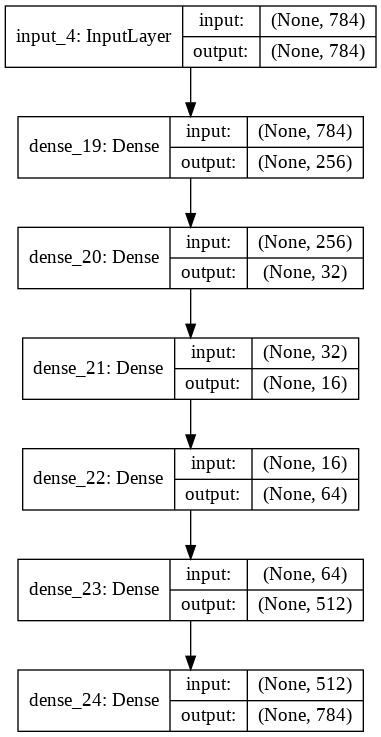

In [24]:
plot_model(autoencoder, to_file='/content/autoencoder.jpg', show_shapes=True, )

In [25]:
# compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
# data preprocessing

(X_train,_), (X_test,_) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
from keras.utils import normalize

X_train = normalize(X_train)
X_test = normalize(X_test)

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [0]:
# train the model

In [30]:
history = autoencoder.fit(X_train, X_train,
                          epochs = 100,
                          batch_size = 1024,
                          validation_data = (X_test, X_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 8s 135us/step - loss: 0.3802 - val_loss: 0.3139
Epoch 2/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.2978 - val_loss: 0.2890
Epoch 3/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.2836 - val_loss: 0.2807
Epoch 4/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.2775 - val_loss: 0.2765
Epoch 5/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.2743 - val_loss: 0.2742
Epoch 6/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.2724 - val_loss: 0.2728
Epoch 7/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.2712 - val_loss: 0.2716
Epoch 8/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.2702 - val_loss: 0.2706
Epoch 9/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.269

In [0]:
autoencoder.save('/content/model_autoencoder.h5')

In [0]:
t = autoencoder.predict(X_test[:1])

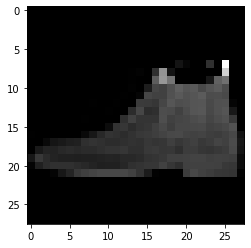

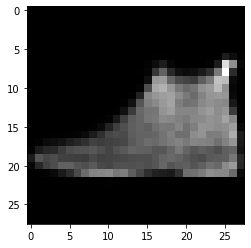

In [35]:
plt.imshow(X_test[0].reshape(28,28))
plt.gray()
plt.show()
plt.imshow(t[0].reshape(28,28))
plt.gray()
plt.show()

In [0]:
# encoder model
encoder_model = Model(i, b)

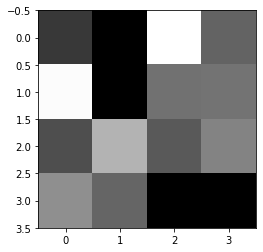

In [37]:
encoded_img = encoder_model.predict(X_test[:1])
plt.imshow(encoded_img[0].reshape(4,4))
plt.gray()
plt.show()

In [0]:
# decoder model
input_b = Input(shape=(16,))
l1 = autoencoder.layers[-3](input_b)
l2 = autoencoder.layers[-2](l1)
o_new = autoencoder.layers[-1](l2)

decoder_model = Model(input_b,o_new)